# Spliting Documents into Sentences

Testing the NLTK sentence tokenizer and the results on documents from IMDB and SRAA data

In [2]:
STRUCTURED = '../structured'
IMDB_DATA = 'C:/Users/mramire8/Documents/Research/Oracle confidence and Interruption/dataset/aclImdb/raw-data'
SRAA_DATA = 'C:/Users/mramire8/Documents/Research/Oracle confidence and Interruption/dataset/sraa/sraa/sraa/partition1/data'

# IMDB_DATA = '/Users/maru/MyCode/data/imdb'
# SRAA_DATA = '/Users/maru/MyCode/data/sraa'

# STRUCTURED = '/Users/maru/My Code/structured'
# IMDB_DATA='/Users/maru/Dataset/aclImdb'
# SRAA_DATA='/Users/maru/Dataset/aviation/data'
# TWIITER_DATA = '/Users/maru/Dataset/twitter'

import sys
import os
sys.path.append(os.path.abspath(STRUCTURED))
import utilities.experimentutils as exputil
import utilities.datautils as datautil
import numpy as np
import nltk
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl



In [3]:
sent_tk = nltk.data.load('tokenizers/punkt/english.pickle')

def load_data(dataname, path, categories=None, keep_subject=True):
    import pickle

    DATA_PKL = path + '/data.pkl'

    if os.path.isfile(DATA_PKL) and False:
        vct, data = pickle.load(open(DATA_PKL, 'rb'))
    else:
        data = datautil.load_dataset(dataname, path, categories=categories, rnd=5463, shuffle=True, keep_subject=keep_subject)
        data.train.data = np.array(data.train.data, dtype=object)
        data.test.data = np.array(data.test.data, dtype=object)
#         data.train.bow = vct.fit_transform(data.train.data)
#         data.test.bow = vct.transform(data.test.data)
#         pickle.dump((vct, data), open(DATA_PKL, 'wb'))

    return data #, vct

# Get the sentences 
def _sentences(docs, doc_labels, sent_tk):
    data = []
    true_labels = []
    sent = sent_tk.tokenize_sents(docs)
    for sentences, doc_label in zip(sent, doc_labels):
        data.extend(sentences)
        true_labels.extend([doc_label] * len(sentences))
    return data, np.array(true_labels), sent

In [4]:
imdb = load_data("imdb", IMDB_DATA)


In [5]:
sraa = load_data("sraa", SRAA_DATA)

In [6]:
def doc_sentence(data, n=50):
    docs = data.data[:n]
    sent = sent_tk.tokenize_sents(docs)
    for d, s in zip(docs, sent):
        print d
        print "Total Sentences: %s" % len(s)
        for i, si in enumerate(s):
            print "{} - {}".format(i, si.encode('utf-8'))
            print "--*" * 20

# Sentence Statistics per Dataset

We compute the number of sentences per document on each dataset. 


In [8]:
from collections import Counter
def sent_counts(data, sent_tk):
    
    allsent, targets, doc_sent = _sentences(data.data, data.target,  sent_tk)
    counts = [len(doc) for doc in doc_sent]
    return Counter(counts), counts

imdb_c, ic = sent_counts(imdb.train, sent_tk)
sraa_c, sc = sent_counts(sraa.train, sent_tk)


In [74]:
print "IMDB average: %s (N=%s)" % (np.mean(ic), len(ic))
print "SRAA average: %s (N=%s)" % (np.mean(sc), len(sc))


IMDB average: 12.4563242767 (N=24991)
SRAA average: 10.4250553173 (N=36607)


== Most common ==
7 - 2062
8 - 2062
9 - 1959
6 - 1852
10 - 1794
== Least common ==
72 - 1
73 - 1
77 - 1
80 - 1
83 - 1
== Documents with less than K=5 sentences ==
Number <5 sents.:2162 
Remaining docs: 22829 


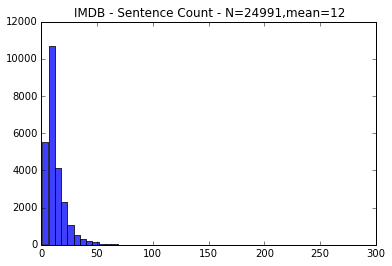

In [71]:
%matplotlib inline
def plot_sentence_freq(counts, name, bins=50, min_k=5):
    a,b,c = plt.hist(counts.keys(), weights=counts.values(), bins=bins, label=name, fill=True, alpha=.75)
    avg = np.sum([k*v for k,v in counts.items()])/ sum(counts.values())
    plt.title("%s - Sentence Count - N=%s,mean=%s" % (name.upper(), sum(counts.values()),avg))

    print "== Most common =="
    print "\n".join("{} - {}".format(k,v) for k,v in counts.most_common(5))
    print "== Least common =="
    print "\n".join("{} - {}".format(k,v) for k,v in sorted(counts.items(), key=lambda x: x[1], reverse=False)[:5])

    print "== Documents with less than K=%s sentences ==" % min_k
    l =  np.sum([v for k,v in counts.items() if k < min_k])
    print "Number <%s sents.:%s " % (min_k, l)
    print "Remaining docs: %s " % ( sum(counts.values())- l)

    
plot_sentence_freq(imdb_c, 'imdb', bins=50, min_k=5)


== Most common ==
7 - 2062
8 - 2062
9 - 1959
6 - 1852
10 - 1794
== Least common ==
72 - 1
73 - 1
77 - 1
80 - 1
83 - 1
== Documents with less than K=5 sentences ==
Number <5 sents.:2162 
Remaining docs: 22823 


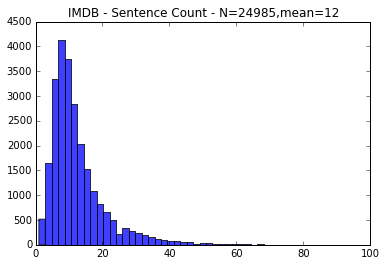

In [72]:
a = Counter({k:v for k,v in imdb_c.items() if k < 100})
plot_sentence_freq(a, 'imdb', bins=50, min_k=5)

== Most common ==
5 - 3269
6 - 3203
4 - 3152
7 - 2915
3 - 2653
== Least common ==
73 - 1
82 - 1
85 - 1
86 - 1
91 - 1
== Documents with less than K=5 sentences ==
Number <5 sents.:8446 
Remaining docs: 28161 


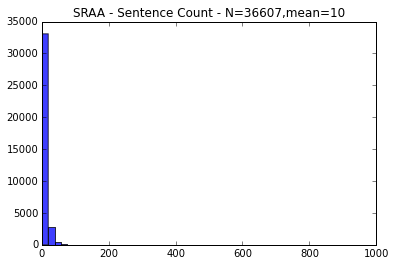

In [65]:
plot_sentence_freq(sraa_c, 'sraa', bins=50, min_k=5)


== Most common ==
5 - 3269
6 - 3203
4 - 3152
7 - 2915
3 - 2653
== Least common ==
73 - 1
82 - 1
85 - 1
86 - 1
91 - 1
== Documents with less than K=5 sentences ==
Number <5 sents.:8446 
Remaining docs: 28078 


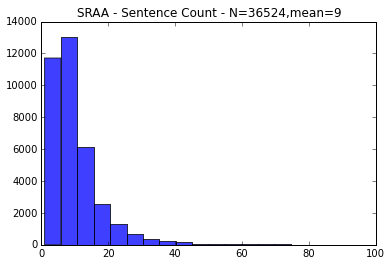

In [66]:
a = Counter({k:v for k,v in sraa_c.items() if k < 100})
plot_sentence_freq(a, 'sraa', bins=20, min_k=5)

## SRAA Documents into Sentences

In [13]:
doc_sentence(sraa.train, n=50)

Subject: Re: <HELP>GPL crashes in win98
Hi Eric,

I'm using the intergraph reactor with the default rendition v1000
driver.  It's the only driver that lets me run N2 in rend mode.  I also
have the bios 74a.  SB awe64, p200mmx 32mb ram.  Thanks for any help.

"Eric T. Busch" wrote:

> Don't worry about the active movie deal.  About the crash, what video
> card and drivers are you using?
>
> - Eric
>
> E. Neal <eddyneal@concentric.net> wrote in message
> news:3648BCF5.28196F00@concentric.net...
> >When installing gpl I was told that my version of active movie was
> newer
> >and that i had to uninstall it.  How do I do that?
> >
> >When i try to run GPL, it crashes.  Below is the message I receive.
> Any
> >remedies?


Total Sentences: 12
0 - Subject: Re: <HELP>GPL crashes in win98
Hi Eric,

I'm using the intergraph reactor with the default rendition v1000
driver.
--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*
1 - It's the only driver that lets me run N2 in rend mode.
--*--*

UnicodeEncodeError: 'ascii' codec can't encode character u'\x92' in position 17: ordinal not in range(128)

## IMDB Sentences into Documents

In [16]:
doc_sentence(imdb.train, n=50)

As the front cover says "The hamlet of our time, for our time".<br /><br />I had to study this filmed version of Hamlet directly after watching Keneth Branagh's version and it was truly a disappointing experience.<br /><br />This version takes a different approach to several aspects of the play including sexuality; one very VERY homosexual Osric and an interesting interaction between Hamlet and Ophelia. I think for the time (60's) this was a very well done version of Hamlet but cannot compare to Branagh's complete version.<br /><br />just a note... I found the video at my local video store (in Australia) and I'm actually looking for a Keneth Branagh DVD to buy if such a thing even exists. If anyone knows of one please tell me.
Total Sentences: 4
0 - As the front cover says "The hamlet of our time, for our time".<br /><br />I had to study this filmed version of Hamlet directly after watching Keneth Branagh's version and it was truly a disappointing experience.<br /><br />This version ta

In [145]:
# How many documents have a br tag
brs = [doc for doc in imdb.train.data if "<br />" in doc]
print "Docs with brs: ", len(brs), 1. * len(brs) / len(imdb.train.data)
    

Docs with brs:  14665 0.586811252051


In [148]:
brs[1].replace("<br />"," ")

u"Alien Hunter: 5 out of 10: Is it me or does every movie that starts in Roswell, New Mexico suck. Take Alien mixed with The Thing, mixed with Contact, mixed with of all things On the Beach, The Andromeda Strain, the classroom scene from Raiders of the Lost Ark and a throw in a little Stargate to boot.   Derivative doesn't even begin to describe this movie. Of course with nothing original plot wise they amp up the gore and sex right? Nope gore is a blink and you miss it affair and sex is all tease. (James Spader causally mentions he needs a shower and the delectable Leslie Stefanson asks to join him\xc2\x85. he turns her down. AGGH!)   In fact if a movie ever needed a shower scene to liven things up this is it. I mean if your going to have impossibly good-looking women in white bathing suits wandering around an Antarctica research base why not go for broke.  With about 30 seconds of actual thrill in the entire movie Alien Hunter is remarkable serious and slow going for a sci-fi adventu

# Removing Salutation in SRAA

First, we remove use the data without the suject line. The from the first line of the email we find the saluation sentence based on simple rules: 

* Salutation is in the first line, ends in a comma 
* Saluation starts with "Hi"


In [99]:
def keep_header_subject(text, keep_subject=False):
    """
    Given text in "news" format, strip the headers, by removing everything
    before the first blank line.
    """
    _before, _blankline, after = text.partition('\n\n')

    sub = [l for l in _before.split("\n") if "Subject:" in l]
    if keep_subject:
        final = sub[0] + "\n" + after
    else:
        final = after
    return final

def find_salutation(text):
    """
    Give an email text, remove the salutation part
    """
    import re
    if len(text) <= 0:
        return None
    
    parts = text.split("\n")
    first = parts[0] if len(parts[0]) >0 else parts[1]

    res = re.search("(\W|^)(Hi|hello|hey|good morning|good evening|good afternoon|thanks|thankyou|thank you)(\W|$)", first, re.IGNORECASE)
#     res = re.search("(\W|^)(thanks|thankyou|thank you)(\W|$)", first, re.IGNORECASE)
    first_tk = first.strip().split()

    result = "Nada"
    if (res is not None) or (len(first_tk) <=3 ):
        ## if there is a salutation i
        if len(first_tk) > 0 and not first_tk[-1][-1].isalnum() :
            # if the last character  of the last token is a special characters
            result =  "\n".join(parts[1:])
        elif (res is not None):
            # if we found greeting words in the  first line
            result = "\n".join(parts[1:])
        else:
            result = text
    else:
        result = text

    return result

In [78]:
sraa2 = [keep_header_subject(doc, keep_subject=False) for doc in sraa.train.data]
print len(sraa2)
    

36609


In [100]:
sraa3=[find_salutation(text) for text in sraa2]
